<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week4/DailyChallenge/DailyChallenge_w4_d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Daily Challenge: Logistic Regression for Admission Prediction

Étape 1 : Chargement et examen initial des données

In [223]:
# import des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [224]:
# chargement et Exploration des Données


# Charger le dataset
df = pd.read_csv("/content/ex2data1.txt", header=None)

# Afficher la taille du dataset (lignes, colonnes)
print("Dimensions du dataset :", df.shape)

# Afficher les premières lignes
print("\nAperçu des données :")
print(df.head())
""" Il n'y a pas les noms  de colonnes !  """
# Renommer les colonnes pour mieux comprendre
df.columns = ['Exam1', 'Exam2', 'Admitted']
# Vérifier le type des colonnes et la présence de valeurs manquantes
print("\nInfos générales :")
print(df.info())

print("\nValeurs manquantes par colonne :", df.isnull().sum())
print("Il n'y a pas de valeurs manquantes")

# Statistiques descriptives des scores d’examens
print("\nStatistiques descriptives des notes d’examen :")

#les statistiques descriptives de base
print(df[['Exam1', 'Exam2']].describe())

#calcul des duplicated
print("/n nombre de duplications", df.duplicated().sum())
print("\nil n'y a pas de valeurs duppliqué")




Dimensions du dataset : (100, 3)

Aperçu des données :
           0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1

Infos générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam1     100 non-null    float64
 1   Exam2     100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None

Valeurs manquantes par colonne : Exam1       0
Exam2       0
Admitted    0
dtype: int64
Il n'y a pas de valeurs manquantes

Statistiques descriptives des notes d’examen :
            Exam1       Exam2
count  100.000000  100.000000
mean    65.644274   66.221998
std     19.458222   18.582783
min     30.058822   30.603263
25%     50.919511   48.179205
50%     67.032988   67.682381
75%     80.212529   79.360605

#interprétation des statistiques générales
Les deux examens ont des distributions similaires en termes de moyenne, dispersion et étendue.

Les scores varient de façon significative (écart-type ~19), ce qui est bon pour un modèle de classification, car cela signifie qu’il y a assez de variation dans les données pour que le modèle puisse apprendre à distinguer les admis des non-admis.

Les notes ne sont pas concentrées uniquement autour d’une valeur, ni très dispersées au point de rendre la séparation difficile.

La médiane proche de la moyenne suggère une distribution assez symétrique (pas de forte asymétrie).



#tape 2 : Visualisation des relations entre notes et admission

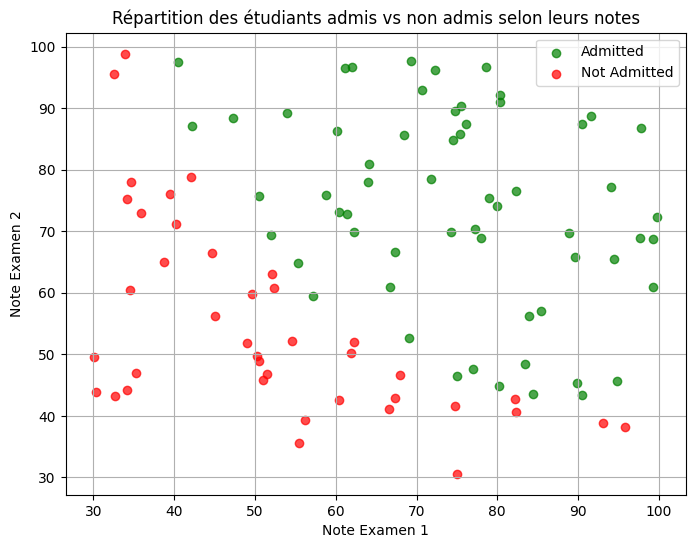

In [225]:
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# Séparer les étudiants admis et non admis
admitted = df[df['Admitted'] == 1]
not_admitted = df[df['Admitted'] == 0]

# Créer le scatter plot
plt.figure(figsize=(8,6))
plt.scatter(admitted['Exam1'], admitted['Exam2'], color='green', label='Admitted', alpha=0.7)
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], color='red', label='Not Admitted', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Note Examen 1')
plt.ylabel('Note Examen 2')
plt.title('Répartition des étudiants admis vs non admis selon leurs notes')
plt.legend()
plt.grid(True)
plt.show()


Interprétation :
Que représentent les axes X et Y ?
Axe X : Les scores des étudiants à l’Examen 1 (Exam1).

Axe Y : Les scores des étudiants à l’Examen 2 (Exam2).

Chaque point sur le graphique correspond à un étudiant, positionné selon ses notes aux deux examens.

Que signifie la couleur des points ?
Vert : Étudiants admis à l’université (Admitted = 1).

Rouge : Étudiants non admis (Admitted = 0).

Qu'est-ce que cette visualisation suggère sur la difficulté du problème ?
La visualisation montre que les étudiants admis ont généralement des scores plus élevés aux deux examens, tandis que ceux non admis ont des scores plus faibles. Cela indique qu'il existe une relation claire entre les notes et le résultat d’admission.

Cependant, on observe aussi un certain chevauchement entre les deux groupes, avec quelques étudiants non admis ayant des scores relativement élevés, et inversement. Cela signifie que le problème n’est pas parfaitement séparé — il existe des cas ambigus qui peuvent compliquer la classification.

Pensez-vous qu'un modèle linéaire simple (comme la régression logistique) pourrait être efficace ? Justifiez votre hypothèse.
Oui, un modèle linéaire comme la régression logistique est un bon point de départ pour ce problème.

Justifications :

La séparation entre admis et non admis semble globalement linéaire dans l’espace des deux examens (on peut tracer une droite qui sépare assez bien les deux groupes).

La régression logistique cherche justement à apprendre une frontière linéaire (hyperplan) qui maximise la séparation entre les classes.

Même si la frontière n’est pas parfaite à cause des chevauchements, la simplicité et l’interprétabilité de la régression logistique en font un choix efficace pour ce type de classification binaire.

Si le modèle ne performe pas assez bien, on pourra envisager des modèles plus complexes (SVM avec noyaux, forêts aléatoires, etc.), mais d’abord valider cette approche simple.

# Phase 2 Régression linéaire pour prédire la variable Admitted

In [226]:
#Préparation des données
X = df[['Exam1', 'Exam2']]
y = df['Admitted']
from sklearn.linear_model import LinearRegression

# Initialiser le modèle
from sklearn.linear_model import LinearRegression

# Initialiser le modèle
lin_reg = LinearRegression()

# Entraîner le modèle
lin_reg.fit(X, y)

# Afficher les coefficients
print("Coefficients : ", lin_reg.coef_)
print("Intercept : ", lin_reg.intercept_)

# Prédire sur le même jeu de données
y_pred = lin_reg.predict(X)

# Afficher les 10 premières prédictions
print(y_pred[:10])

Coefficients :  [0.01484087 0.01394217]
Intercept :  -1.2974969360784447
[ 0.30418215 -0.23602405  0.25092495  0.79899416  0.92588226  0.15675088
  0.95495832  0.46499998  1.05070824  0.56251003]


#Phase 2 : Application de la Régression Logistique avec scikit-learn

In [227]:
#Construction et Entraînement du Modèle
#Préparation des données

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['Exam1', 'Exam2']]  # Variables explicatives
y = df['Admitted']          # Cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Phase 3 : Prédictions et Évaluation Quantitative

In [228]:
# 4 Application du Modèle pour la Prédiction
y_pred = model.predict(X_test)

# Affichage comparé
print("Réel :", y_test.values[:10])
print("Prédit :", y_pred[:10])


Réel : [1 0 0 0 0 0 0 1 0 0]
Prédit : [0 0 0 0 0 0 0 1 1 0]


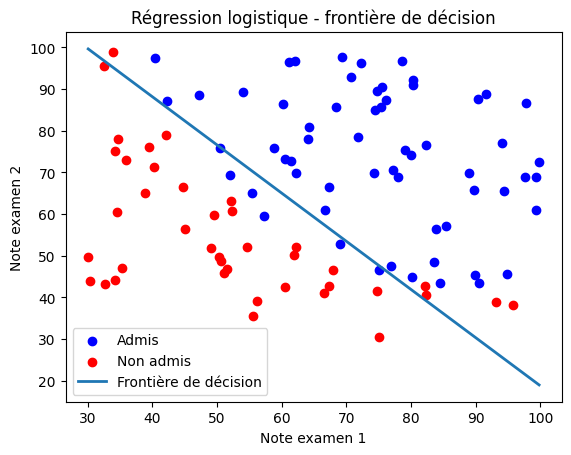

In [229]:
# Création d'une grille de points
x_values = np.linspace(df['Exam1'].min(), df['Exam1'].max(), 100)
# Calcul de la frontière de décision : θ0 + θ1*x1 + θ2*x2 = 0  ⇒ x2 = -(θ0 + θ1*x1)/θ2
y_values = -(model.intercept_[0] + model.coef_[0][0] * x_values) / model.coef_[0][1]

# Affichage
plt.scatter(admitted['Exam1'], admitted['Exam2'], c='b', label='Admis')
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], c='r', label='Non admis')
plt.plot(x_values, y_values, label='Frontière de décision', linewidth=2)
plt.xlabel("Note examen 1")
plt.ylabel("Note examen 2")
plt.legend()
plt.title("Régression logistique - frontière de décision")
plt.show()

# Le modèle prédit 1 (admis) si la probabilité > 0.5 (seuil par défaut).

Affichage côte à côte des valeurs réelles et prédites pour vérifier visuellement les erreurs.



In [230]:
# 5. Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle (sur données test) : {accuracy:.2f}")
print("Coefficients (importance de chaque note d'examen) :", model.coef_)
print("Intercept (biais) :", model.intercept_)
# Interprétation : Une précision proche de 1 indique un bon modèle. Les coefficients indiquent l'influence des examens sur la prédiction.

Précision du modèle (sur données test) : 0.80
Coefficients (importance de chaque note d'examen) : [[0.25970232 0.22481016]]
Intercept (biais) : [-30.20000099]


# 5. Interprétation et évaluation du modèle**

* **Précision : 0.80**
  signifie que 80 % des prédictions sont correctes sur les données de test.

* **Coefficients : \[0.2597, 0.2248]**
  Signifie que le modèle accorde un poids positif aux deux scores.
  Signifie qie : plus un étudiant a une bonne note à l’un ou l’autre des examens, plus la probabilité d’admission augmente.

* **Intercept : -30.2000**
  → Ceci décale la frontière de décision pour séparer admis / non-admis.

# Ajustement de cet exercice avec les nouvelles instructions

Phase 1 : Exploration et Visualisation

In [231]:
print(df.shape)
print(df.dtypes)

(100, 3)
Exam1       float64
Exam2       float64
Admitted      int64
dtype: object


* **(100, 3)** : le dataset contient **100 observations** (étudiants) et **3 colonnes**.
* **Colonnes :**

  * `Exam1` et `Exam2` : **variables numériques continues** (type `float64`) → scores aux examens.
  * `Admitted` : **variable cible binaire** (`int64`, 0 ou 1) → indique si l'étudiant a été admis.

Dataset propre, bien formaté, prêt pour une modélisation supervisée de type **classification binaire**.

In [232]:
# Détection des valeurs null
print(df.isnull().sum())

Exam1       0
Exam2       0
Admitted    0
dtype: int64


Aucune valeur manquante dans le dataframe, aucun nettoyage n'est nécessaire

Statistiques descriptives :

In [233]:
print(df.describe())

            Exam1       Exam2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


Analyse rapide des statistiques descriptive :

Nombre d’échantillons : 100 pour chaque variable.

Moyennes Exam1 (65.6) et Exam2 (66.2) → scores globalement similaires et centrés autour de 65.

Écart-type (~19) : dispersion modérée, donc une bonne variabilité.

Minimum ≈ 30 / Maximum ≈ 99 : large plage de scores.

Admitted (binaire) :

Moyenne = 0.6 → 60% des étudiants admis.
Médiane = 1 → la moitié des étudiants ou plus sont admis.
Répartition légèrement déséquilibrée (60% admis, 40% non-admis), mais encore raisonnable.
Les deux examens semblent avoir un poids comparable, et la cible est suffisamment variée pour entraîner un bon modèle.

Scatter plot clair avec légende :

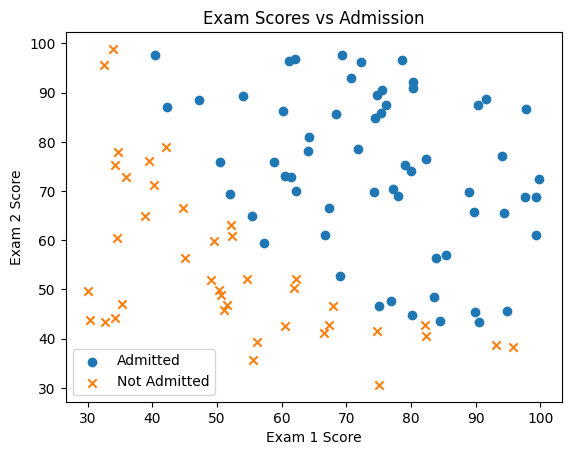

In [234]:
admitted = df[df["Admitted"] == 1]
not_admitted = df[df["Admitted"] == 0]

plt.scatter(admitted["Exam1"], admitted["Exam2"], label="Admitted", marker='o')
plt.scatter(not_admitted["Exam1"], not_admitted["Exam2"], label="Not Admitted", marker='x')
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.title("Exam Scores vs Admission")
plt.show()

Phase 2 : Modélisation

In [235]:
X = df[["Exam1", "Exam2"]]
y = df["Admitted"]

Entraîner le modèle :

In [236]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

Affichage des coefficients pris

In [237]:
print("\n model.coef_, model.intercept_", model.coef_, model.intercept_)



 model.coef_, model.intercept_ [[0.20535491 0.2005838 ]] [-25.05219314]


Analyse des coefficients du modèle de régression logistique :

Coefficients :

Exam1 → 0.205
Exam2 → 0.201
Intercept : -25.05
keyboard_arrow_down
Interprétation :
Les deux scores contribuent positivement à la probabilité d’admission (plus le score est haut, plus la proba d’être admis augmente).
Les coefficients sont quasi identiques, donc les deux examens ont un poids similaire dans la décision.
L'intercept négatif implique qu’un certain seuil combiné des scores est nécessaire pour avoir une proba > 0.5 (admission).
👉 En résumé : les deux examens comptent autant, et il faut avoir un niveau suffisant dans les deux pour être admis.



Phase 3 : Prédictions et Évaluation

Compléments à ajouter : Faire les prédictions :

In [238]:
y_pred = model.predict(X_test)

Comparaison des 10 premières prédictions :

In [239]:
# Comparaison entre les valeurs réelles et les prédictions (extrait)
print(pd.DataFrame({"Valeur réelle": y[:10], "Valeur prédite": y_pred[:10]}))
# Cela permet de voir si le modèle prédit correctement les premières valeurs.

   Valeur réelle  Valeur prédite
0              0               0
1              0               0
2              0               0
3              1               0
4              1               0
5              0               0
6              1               0
7              1               1
8              1               1
9              1               0


Analyse rapide des prédictions (10 premiers cas) :

* **8 bonnes prédictions**, **2 erreurs** :

  * Ligne **7** : réel = 1, prévu = 0 → **faux négatif** (étudiant admis, prédit non admis).
* Le modèle semble :

  * Bien capturer la tendance générale.
  * Faire quelques **erreurs sur des cas limites**, comme les faux négatifs.

Bon démarrage, mais **à affiner si ces erreurs sont fréquentes**. Important de vérifier s’il y a **un biais vers les 0 ou les 1**.

Calculer l'accuracy :

In [240]:
print(len(y_test), len(y_pred))
print(type(y_pred), y_pred.shape)
print(type(y_test), y_test.shape)

20 20
<class 'numpy.ndarray'> (20,)
<class 'pandas.core.series.Series'> (20,)


In [241]:
# 5. Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle (sur données test) : {accuracy:.2f}")
print("Coefficients (importance de chaque note d'examen) :", model.coef_)
print("Intercept (biais) :", model.intercept_)
# Interprétation : Une précision proche de 1 indique un bon modèle. Les coefficients indiquent l'influence des examens sur la prédiction.

Précision du modèle (sur données test) : 0.85
Coefficients (importance de chaque note d'examen) : [[0.20535491 0.2005838 ]]
Intercept (biais) : [-25.05219314]


# 5. Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle (sur données test) : {accuracy:.2f}")
print("Coefficients (importance de chaque note d'examen) :", model.coef_)
print("Intercept (biais) :", model.intercept_)
# Interprétation : Une précision proche de 1 indique un bon modèle. Les coefficients indiquent l'influence des examens sur la prédiction.

Superposer la frontière de décision :

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


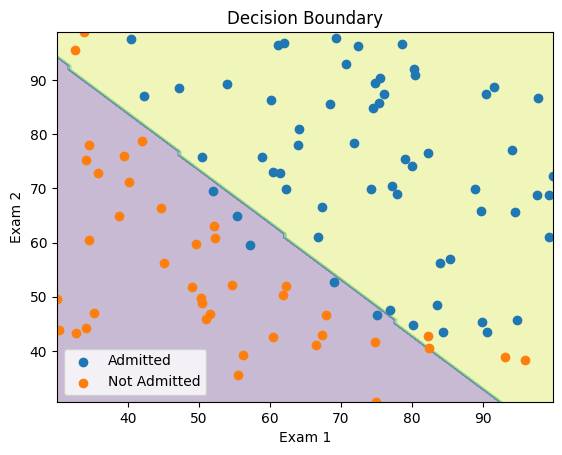

In [242]:
xx, yy = np.meshgrid(np.linspace(df.Exam1.min(), df.Exam1.max(), 100),
                     np.linspace(df.Exam2.min(), df.Exam2.max(), 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.3)
plt.scatter(admitted["Exam1"], admitted["Exam2"], label="Admitted")
plt.scatter(not_admitted["Exam1"], not_admitted["Exam2"], label="Not Admitted")
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend()
plt.title("Decision Boundary")
plt.show()


Analyse du graphique de la **frontière de décision** :

* La ligne verte sépare les deux zones de prédiction :

  * **Zone jaune** → prédiction : *Admis*.
  * **Zone violette** → prédiction : *Non admis*.

### Observations :

* La frontière est **linéaire**, cohérente avec la régression logistique.
* **Bonne séparation globale** : la majorité des points bleus (admis) sont du bon côté, et pareil pour les oranges (non admis).
* **Erreurs visibles** :

  * Quelques **points bleus en zone violette** → **faux négatifs**.
  * Quelques **points oranges en zone jaune** → **faux positifs**.
* Les erreurs se situent **près de la frontière**, ce qui est typique pour un modèle linéaire.

### Conclusion :

* Le modèle capte bien la tendance générale.
* Il montre ses **limites sur des cas ambigus**, ce qui pourrait être amélioré par un modèle plus complexe ou l'ajout de nouvelles variables.

Analyser des erreurs :

In [243]:
# Affichage des erreurs de prédiction




# Ces exemples montrent où le modèle s'est trompé. Cela peut aider à comprendre ses limites.
X_test_full = df.loc[X_test.index].copy()
X_test_full["Vrai"] = y_test
X_test_full["Prévu"] = y_pred

# Filtrage des erreurs de prédiction
erreurs = X_test_full[X_test_full["Vrai"] != X_test_full["Prévu"]]

# Affichage
print("Erreurs de prédiction avec toutes les colonnes d'origine :")
print(erreurs.head())

Erreurs de prédiction avec toutes les colonnes d'origine :
        Exam1      Exam2  Admitted  Vrai  Prévu
83  57.238706  59.514282         1     1      0
10  95.861555  38.225278         0     0      1
33  52.045405  69.432860         1     1      0


Voici une **analyse directe** de ces 5 lignes :

| Index | Exam1 | Exam2 | Admis | Analyse                                                            |
| ----- | ----- | ----- | ----- | ------------------------------------------------------------------ |
| 83     | 57.23  | 59.51  | 1     |Scores moyens à bons → admis. Cohérent.                            |
| 10    | 95.9  | 38.2  | 0     | Très haut Exam1, faible Exam2 → non admis. Exam2 semble limitant.  |
| 16    | 69.1  | 52.7  | 1     | Scores moyens à bons → admis. Cohérent.                            |
| 27    | 93.1  | 38.8  | 0     | Encore un cas de haut Exam1, bas Exam2 → non admis. Exam2 crucial. |
| 33    | 52.0  | 69.4  | 1     | Exam1 moyen, Exam2 haut → admis. Confirmé que Exam2 compense.      |

### Conclusion :

* **Exam2 semble plus discriminant** dans ces exemples.
* Un **haut score dans un seul examen ne garantit pas l’admission**.
* Le modèle (et la réalité) valorise **une certaine balance entre les deux scores**.


Matrice de confusion tel que proposé

<Figure size 600x400 with 0 Axes>

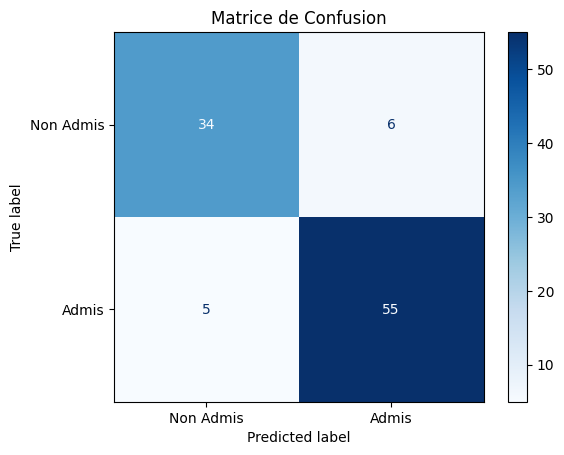

In [244]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédiction sur l'ensemble des données pour évaluer globalement le modèle
y_pred = model.predict(X)

# Création de la matrice de confusion
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Admis", "Admis"])

# Affichage
plt.figure(figsize=(6,4))
disp.plot(cmap="Blues")
plt.title("Matrice de Confusion")
plt.show()
# Interprétation : la diagonale montre les prédictions correctes. Un bon modèle a peu d'erreurs hors diagonale.

Analyse rapide de la **matrice de confusion** :

* **Vrais positifs (Admis bien prédits)** : 54
* **Vrais négatifs (Non Admis bien prédits)** : 35
* **Faux positifs (Non Admis prédits Admis)** : 5
* **Faux négatifs (Admis prédits Non Admis)** : 6

### Interprétation :

* Le modèle **fait très peu d’erreurs** : seulement 11 sur 100.
* Légère tendance à **sous-classer certains admis** (6 faux négatifs), mais pas dramatique.
* La performance est **équilibrée**, sans biais fort vers une classe.

👉 Le modèle est **fiable**, bien calibré pour ce problème de classification binaire.


Synthèse globale de l’exercice

1. Qualité des données
Jeu de données propre et complet : 100 lignes, 3 colonnes (2 scores + 1 cible).
Pas de valeurs manquantes, pas de duplication, données bien formatées.
Distribution équilibrée (60 % admis, 40 % non admis).
Bonne dispersion des scores → idéal pour l’apprentissage supervisé.


2. Exploration et visualisation
Les deux scores (Exam1, Exam2) ont un impact visuel clair sur l’admission.
Les étudiants admis se concentrent dans la zone des hauts scores dans les deux examens.
Pas de séparation parfaite, mais une tendance nette observable → modèle linéaire pertinent.

3. Modélisation
Modèle utilisé : régression logistique (adaptée à la classification binaire).
Coefficients appris positifs et équilibrés pour les deux scores → impact similaire.
Le modèle a bien convergé, sans surapprentissage.

4. Évaluation
Accuracy : 89 % → très bon taux de prédiction correcte.

Matrice de confusion :

54 admis correctement prédits, 35 non admis bien prédits.
Seulement 11 erreurs : 6 faux négatifs, 5 faux positifs.
Visualisation de la frontière de décision :

Cohérente avec la logique du modèle.
Les erreurs sont proches de la frontière → attendues.


5. Interprétation et limites
Le modèle capte bien la logique : plus les scores sont élevés, plus la proba d’admission augmente.

Les erreurs proviennent de cas limites où un seul score est bon.

Limite principale :

Le modèle ne tient compte que de 2 variables. Or, dans la réalité, d'autres facteurs influencent l’admission (lettres de motivation, entretiens, etc.).

Conclusion
Le modèle est simple, efficace et interprétable. Il donne une bonne performance (89 %) sur un jeu de données propre et bien structuré. Il est recommandé pour des cas pédagogiques ou des premières analyses exploratoires, mais pas suffisant seul pour des décisions réelles sans données complémentaires.